In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns


####A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.

 ### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LabTAT.csv to LabTAT.csv


In [ ]:
data = pd.read_csv("LabTAT.csv")

In [ ]:
data.head()

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0        185.35        165.53        176.70        166.13
1        170.49        185.91        198.45        160.79
2        192.77        194.92        201.23        185.18
3        177.33        183.00        199.61        176.42
4        193.41        169.57        204.63        152.60

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
##Applying Descriptive Statistics##
data.describe()

Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
count    120.000000    120.000000    120.000000     120.00000
mean     178.361583    178.902917    199.913250     163.68275
std       13.173594     14.957114     16.539033      15.08508
min      138.300000    140.550000    159.690000     124.06000
25%      170.335000    168.025000    188.232500     154.05000
50%      178.530000    178.870000    199.805000     164.42500
75%      186.535000    189.112500    211.332500     172.88250
max      216.390000    217.860000    238.700000     205.18000

In [ ]:
data.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [ ]:
## We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data####
data[data.duplicated()].shape

(0, 4)

In [ ]:
data[data.duplicated()]

Empty DataFrame
Columns: [Laboratory 1, Laboratory 2, Laboratory 3, Laboratory 4]
Index: []

<Axes: >

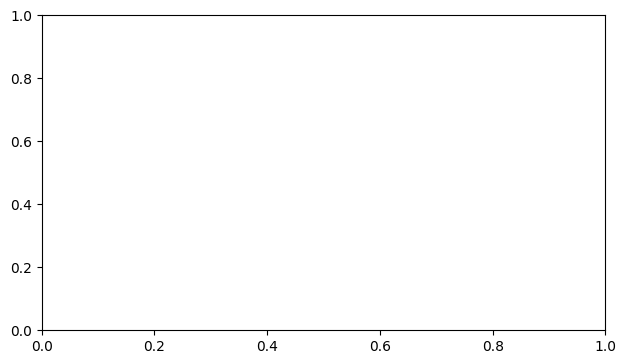

In [ ]:
plt.subplots(figsize = (16,9))
plt.subplot(221)

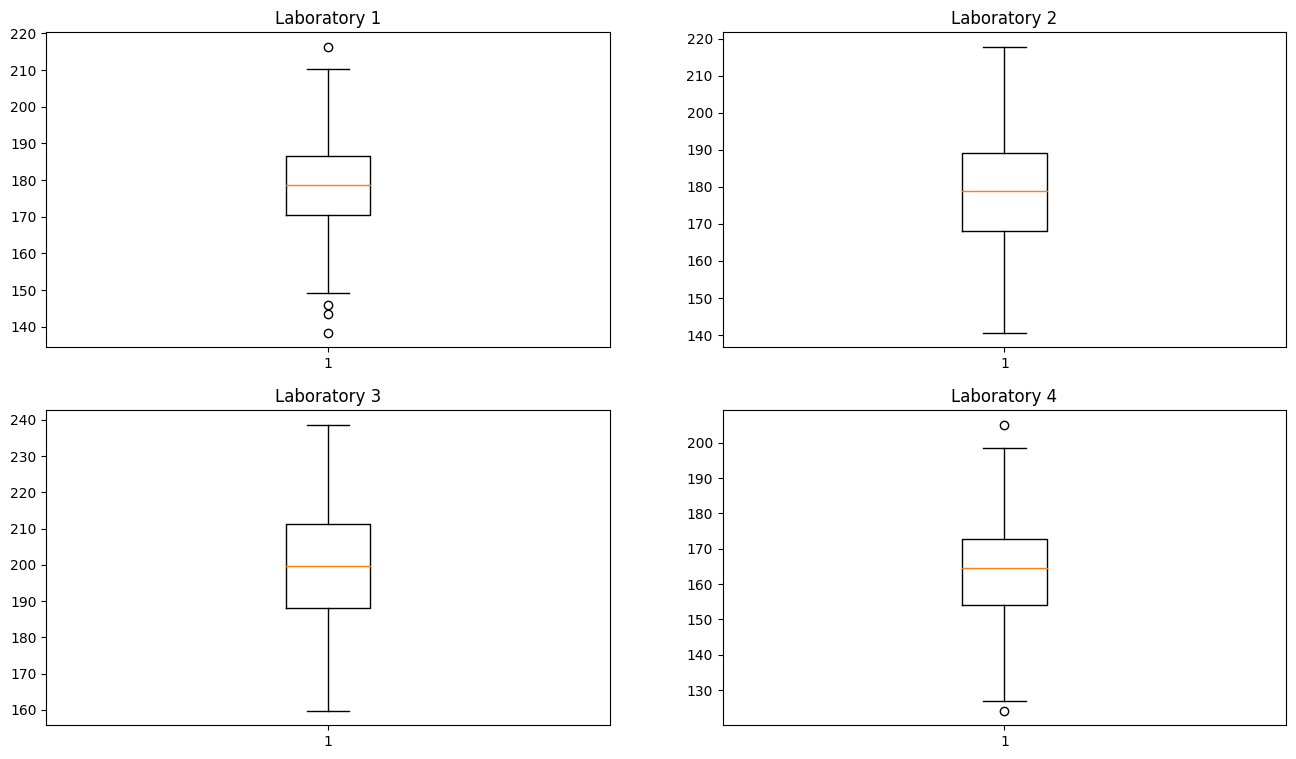

In [ ]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

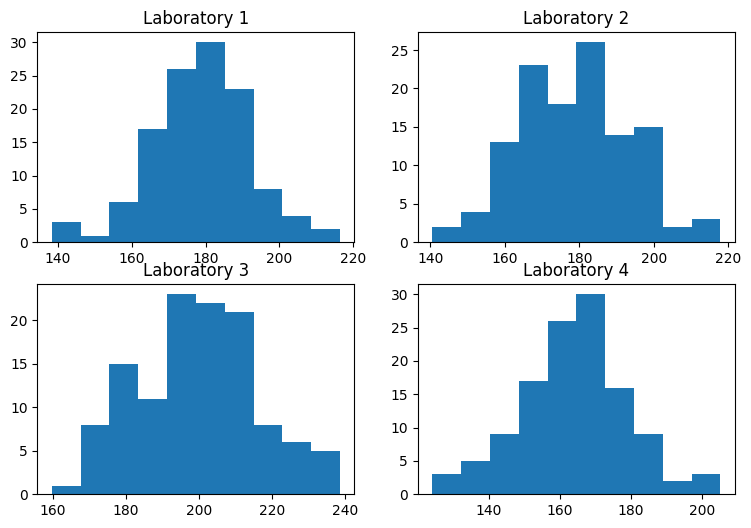

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(data['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(data['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(data['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(data['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

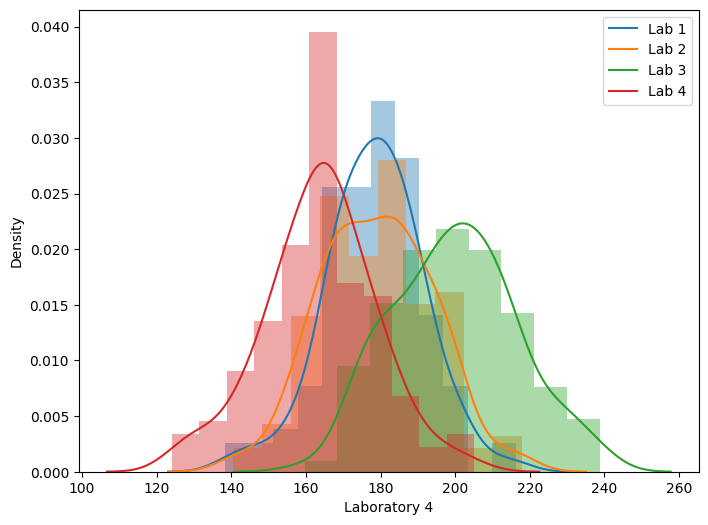

In [ ]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(data['Laboratory 1'],hist = True)
sns.distplot(data['Laboratory 2'],hist = True)
sns.distplot(data['Laboratory 3'],hist = True)
sns.distplot(data['Laboratory 4'],hist = True)
plt.legend(labels)

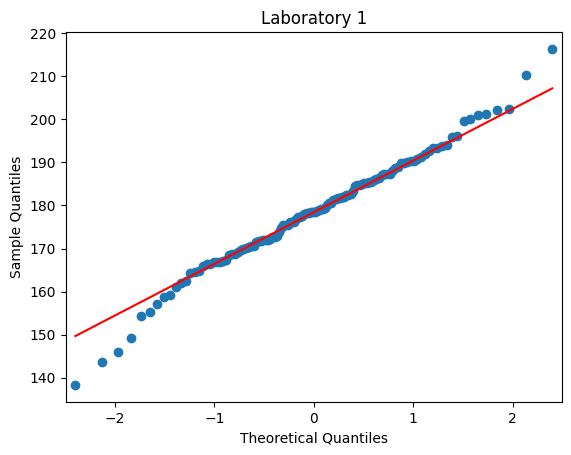

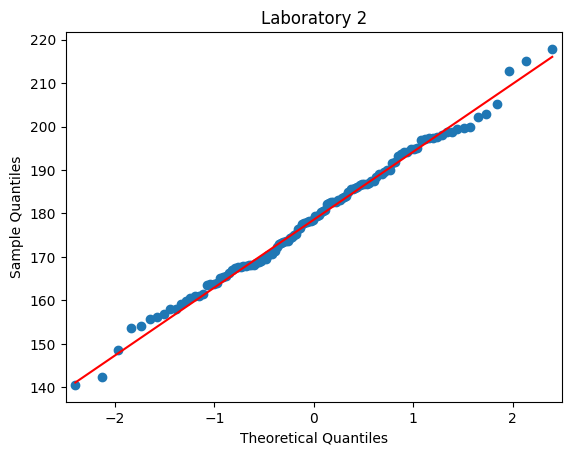

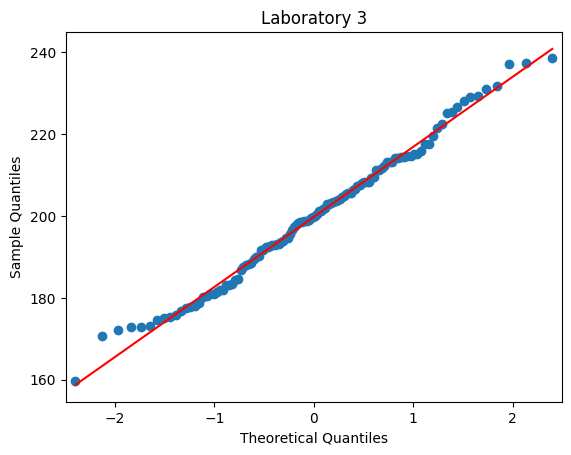

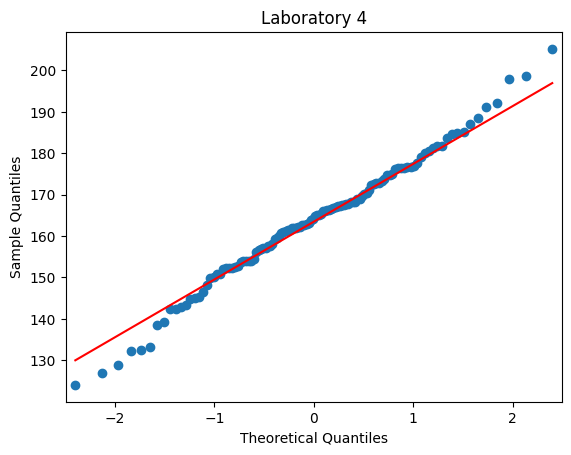

In [ ]:
## Q-Q plot check whether the distribution follows normal distribution or not##
sm.qqplot(data['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(data['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(data['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(data['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

In [ ]:
test_statistic , p_value = stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [55]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' %(alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories
